In [64]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0] # 1st column
        y = points[i, 1] # 2nd column
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        old_b = b
        old_m = m
        b, m = step_gradient(b, m, array(points), learning_rate)
        print("Iteration : ",i+1)
        print("Intercept and Slope :",b, m)
        print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(b, m, compute_error_for_line_given_points(b, m, points)))
        change = abs(old_b-b)
        if change<0.001:
          break
    return [b, m]



In [65]:
  points = pd.read_csv("https://raw.githubusercontent.com/nursnaaz/DataSciencewithPractical/main/11.%20Linear%20Regression-2/sample_lr.csv", delimiter=",")
  points = numpy.array(points)
  print(points)
  learning_rate = 0.01
  initial_b = 0 # initial y-intercept guess
  initial_m = 0 # initial slope guess
  num_iterations = 100
  print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
  print("Running...")
  [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
  #print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

[[1 1]
 [3 2]
 [4 5]
 [6 6]]
Starting gradient descent at b = 0, m = 0, error = 16.5
Running...
Iteration :  1
Intercept and Slope : 0.07 0.315
Starting gradient descent at b = 0.07, m = 0.315, error = 7.7847375
Iteration :  2
Intercept and Slope : 0.11655 0.52745
Starting gradient descent at b = 0.11655, m = 0.52745, error = 3.8255332737499996
Iteration :  3
Intercept and Slope : 0.1472975 0.670782
Starting gradient descent at b = 0.1472975, m = 0.670782, error = 2.0268142536432503
Iteration :  4
Intercept and Slope : 0.16739681 0.7675287550000001
Starting gradient descent at b = 0.16739681, m = 0.7675287550000001, error = 1.209517336843752
Iteration :  5
Intercept and Slope : 0.18032186095 0.8328770642500001
Starting gradient descent at b = 0.18032186095, m = 0.8328770642500001, error = 0.8380421825707283
Iteration :  6
Intercept and Slope : 0.18841402923349998 0.877062644066
Starting gradient descent at b = 0.18841402923349998, m = 0.877062644066, error = 0.6690873653578038
Iteratio

In [66]:
import pandas as pd

In [67]:
  data = pd.read_csv("https://raw.githubusercontent.com/nursnaaz/DataSciencewithPractical/main/11.%20Linear%20Regression-2/sample_lr.csv", delimiter=",")


In [68]:
data

,x,y
0,1,1
1,3,2
2,4,5
3,6,6


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
X = data[['x']]

In [71]:
y = data['y']

In [72]:
X

,x
0,1
1,3
2,4
3,6


In [73]:
y

0    1
1    2
2    5
3    6
Name: y, dtype: int64

In [74]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [75]:
model.intercept_

-0.2692307692307683

In [76]:
model.coef_

array([1.07692308])

In [77]:
import matplotlib.pyplot as plt

In [78]:
m = model.coef_[0]

In [79]:
b = model.intercept_

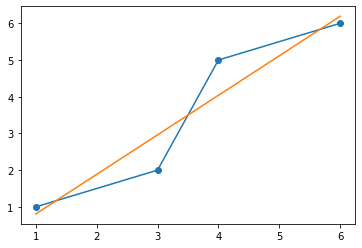

In [80]:
plt.scatter(X,y)
plt.plot(X,y)
plt.plot(X,(m*X+b))

In [59]:
(m*X+b)

,x
0,0.807692
1,2.961538
2,4.038462
3,6.192308


In [62]:
X,y

(   x
 0  1
 1  3
 2  4
 3  6, 0    1
 1    2
 2    5
 3    6
 Name: y, dtype: int64)